<a href="https://colab.research.google.com/github/SABBIRAHAMMED3/ML/blob/main/ratingcurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the rating curve function (Kennedy-type)
def rating_curve(h, C, h0, b):
    return C * (h - h0)**b

# Load Excel file with two sheets
df = pd.read_excel(r"S:\Thesis proposed\Thesis Data\Water Level\SW131.5.xlsx", sheet_name=["WL", "Discharge Q"])

# Get the two DataFrames
wl_df = df["WL"]
discharge_df = df["Discharge Q"]

# Convert to datetime (with coercion to handle bad formats)
wl_df["Date"] = pd.to_datetime(wl_df["Date"], errors='coerce')
discharge_df["Date"] = pd.to_datetime(discharge_df["Date"], errors='coerce')

# Drop rows where Date is NaT
wl_df = wl_df.dropna(subset=["Date"])
discharge_df = discharge_df.dropna(subset=["Date"])

# Sort before merge_asof
wl_df = wl_df.sort_values("Date")
discharge_df = discharge_df.sort_values("Date")

# Merge based on nearest timestamp
merged = pd.merge_asof(discharge_df, wl_df, on="Date", direction="nearest")

# Drop rows with NaN in either discharge or water level
merged = merged.dropna(subset=["m3/sec", "WL (mPWD)"])

# Remove infinite values just in case
merged = merged[np.isfinite(merged["m3/sec"]) & np.isfinite(merged["WL (mPWD)"])]

# Extract discharge and water level
Q = merged["m3/sec"].values
h = merged["WL (mPWD)"].values

# Initial parameter guess
initial_guess = [1, min(h)-0.1, 1]

# Fit the curve
params, _ = curve_fit(rating_curve, h, Q, p0=initial_guess)

# Extract fitted parameters
C, h0, b = params
print(f"Fitted Parameters: C = {C:.4f}, h0 = {h0:.4f}, b = {b:.4f}")

# Plot
h_plot = np.linspace(min(h), max(h), 100)
Q_fit = rating_curve(h_plot, *params)

plt.scatter(h, Q, label="Observed", color="blue",s = 10)
plt.plot(h_plot, Q_fit, label="Fitted Kennedy Curve", color="red")
plt.xlabel("Water Level (mPWD)")
plt.ylabel("Discharge (m³/s)")
plt.legend()
plt.grid()
plt.title("Rating Curve using Kennedy Equation")
plt.show()

Fitted Parameters:
C = 1.8346
h0 = 5.8475
b = 2.7224


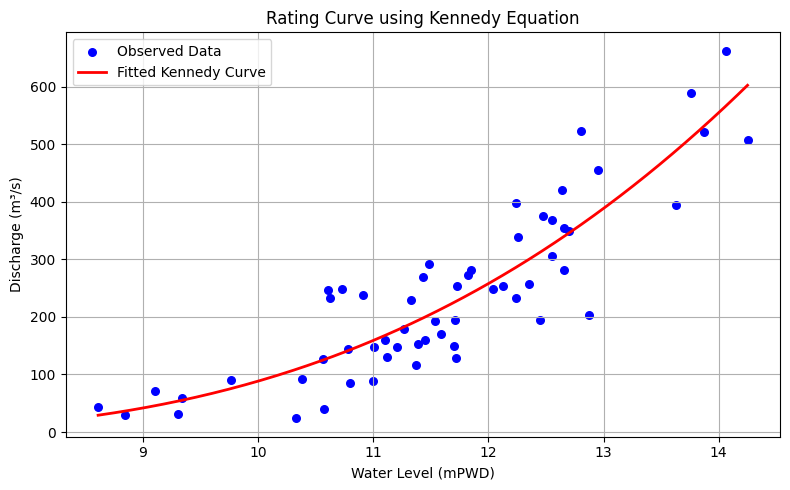

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Kennedy-type rating curve function
def kennedy_curve(h, C, h0, b):
    return C * (h - h0) ** b

# Load the CSV file
df = pd.read_csv("RatingCurve.csv")  # Make sure the file is in your working directory

# Extract discharge (Q) and water level (h)
Q = df["Q"].values
h = df["WL_mPWD"].values

# Remove any rows where h <= min(h) to avoid negative powers
mask = h > (min(h) - 0.1)
Q = Q[mask]
h = h[mask]

# Initial parameter guess: [C, h0, b]
initial_guess = [1, min(h) - 0.1, 1]

# Fit the Kennedy equation to the data
params, _ = curve_fit(kennedy_curve, h, Q, p0=initial_guess, maxfev=10000)

C, h0, b = params
print(f"Fitted Parameters:\nC = {C:.4f}\nh0 = {h0:.4f}\nb = {b:.4f}")

# Generate curve for plotting
h_plot = np.linspace(min(h), max(h), 200)
Q_fit = kennedy_curve(h_plot, *params)

# Plot observed data and fitted curve
plt.figure(figsize=(8, 5))
plt.scatter(h, Q, label="Observed Data", color="blue", s=30)
plt.plot(h_plot, Q_fit, label="Fitted Kennedy Curve", color="red", linewidth=2)
plt.xlabel("Water Level (mPWD)")
plt.ylabel("Discharge (m³/s)")
plt.title("Rating Curve using Kennedy Equation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
